In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
!sudo apt install -y fonts-nanum*  > /dev/null
!sudo fc-cache -fv                 > /dev/null
!rm ~/.cache/matplotlib -rf        > /dev/null
mpl.rc('font', family='NanumGothic')

mpl.rc('axes', unicode_minus=False)

In [ ]:
hs = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/healthcare_edit.csv'
df = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/인구대비데이터정리.csv'
ar = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/면적(2019).csv'

hs = pd.read_csv(hs)
df = pd.read_csv(df)
ar = pd.read_csv(ar)

## 컬럼정리

In [ ]:
hs.dtypes

Unnamed: 0      int64
가입자 일련번호        int64
연령대코드           int64
시도코드            int64
서식코드            int64
진료과목코드          int64
주상병코드          object
입내원일수           int64
심결가산율         float64
심결요양급여비용총액      int64
dtype: object

In [ ]:
df2 = hs.groupby('시도코드')[['입내원일수', '심결요양급여비용총액']].sum()
df2.head()

,입내원일수,심결요양급여비용총액
시도코드,,
11,4191024,187836166960
21,1914593,85683171090
22,1113887,50084064620
23,1272059,59609191530
24,696180,32915444680


In [ ]:
df3 = pd.merge(df, df2, on='시도코드')
del df3['Unnamed: 0']
df3.rename(columns={'십만명당 회피가능사망율':'십만명당 회피가능사망수'},inplace=True)
df3.head(3)

,시도코드,시도명,십만명당 회피가능사망수,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수,입내원일수,심결요양급여비용총액
0,11,서울특별시,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859,4191024,187836166960
1,21,부산광역시,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495,1914593,85683171090
2,22,대구광역시,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563,1113887,50084064620


In [ ]:
df3['인구당 요양급여비'] = df3['심결요양급여비용총액'] / df3['총 인구']
df3['인구당 입내원일수'] = df3['입내원일수'] / df3['총 인구']
df4 = pd.merge(df3, ar, on='시도코드')
del df4['Unnamed: 0']
del df4['시도']
df4.head(3)

,시도코드,시도명,십만명당 회피가능사망수,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수,입내원일수,심결요양급여비용총액,인구당 요양급여비,인구당 입내원일수,면적(2019)
0,11,서울특별시,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859,4191024,187836166960,19486.007369,0.434774,605237001.6
1,21,부산광역시,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495,1914593,85683171090,25404.979491,0.567675,770073413.2
2,22,대구광역시,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563,1113887,50084064620,20611.235100,0.458401,883517307.5


In [ ]:
df4.columns

Index(['시도코드', '시도명', '십만명당 회피가능사망수', '총 인구', '주민등록인구', '의료인수합계', '의사', '간호사',
       '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '병상수합계', '천명당 병상수', '요양기관합계',
       '상급종합병원', '종합병원', '병원', '의원', '천명당 요양기관수', '천명당 상급+종합병원수', '입내원일수',
       '심결요양급여비용총액', '인구당 요양급여비', '인구당 입내원일수', '면적(2019)'],
      dtype='object')

In [ ]:
df4['면적당 요양기관수'] = df4['요양기관합계'] / df4['면적(2019)']
df4['면적당 요양기관수(상급)'] = df4['상급종합병원'] / df4['면적(2019)']
df4['면적당 요양기관수(상급+종합)'] = ( df4['상급종합병원']+df4['종합병원']) / df4['면적(2019)']
df4['면적당 요양기관수(종합)'] = df4['종합병원'] / df4['면적(2019)']
df4['면적당 요양기관수(병원)'] = df4['병원'] / df4['면적(2019)']
df4['면적당 요양기관수(의원)'] = df4['의원'] / df4['면적(2019)']

In [ ]:
df4['천명당 요양기관수(상급)'] = df4['상급종합병원'] / df4['총 인구'] * 1000
df4['천명당 요양기관수(상급+종합)'] = ( df4['상급종합병원']+df4['종합병원']) / df4['총 인구'] * 1000
df4['천명당 요양기관수(종합)'] = df4['종합병원'] / df4['총 인구'] * 1000
df4['천명당 요양기관수(병원)'] = df4['병원'] / df4['총 인구'] * 1000
df4['천명당 요양기관수(의원)'] = df4['의원'] / df4['총 인구'] * 1000

In [ ]:
df4.columns

Index(['시도코드', '시도명', '십만명당 회피가능사망수', '총 인구', '주민등록인구', '의료인수합계', '의사', '간호사',
       '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '병상수합계', '천명당 병상수', '요양기관합계',
       '상급종합병원', '종합병원', '병원', '의원', '천명당 요양기관수', '천명당 상급+종합병원수', '입내원일수',
       '심결요양급여비용총액', '인구당 요양급여비', '인구당 입내원일수', '면적(2019)', '면적당 요양기관수',
       '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)', '면적당 요양기관수(병원)',
       '면적당 요양기관수(의원)', '천명당 요양기관수(상급)', '천명당 요양기관수(상급+종합)', '천명당 요양기관수(종합)',
       '천명당 요양기관수(병원)', '천명당 요양기관수(의원)'],
      dtype='object')

## 의료기관 내 의료종사자 수 정리

In [ ]:
em = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/employees.csv'
em = pd.read_csv(em)
em.replace(['서울', '부산', '인천', '대구', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '세종'],
       ['11', '21', '23', '22', '24', '25', '26', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '29'],inplace=True)
em = em[em['요양기관종별'] != '소계']
em.rename(columns={'시도':'시도코드'},inplace=True)
em['의료인수'] = em['의사계'] + em['간호사계']
del em['의사계']
del em['간호사계']
em.head(5)

,시도코드,요양기관종별,의료인수
1,11,상급종합병원,32841
2,11,종합병원,19355
3,11,병원,8105
4,11,의원,17135
6,21,상급종합병원,6124


In [ ]:
em = em.pivot(index='시도코드', columns='요양기관종별')
em.columns = ['병원',	'상급종합병원',	'의원',	'종합병원']
em.head()

,병원,상급종합병원,의원,종합병원
시도코드,,,,
11,8105.0,32841.0,17135.0,19355.0
21,4409.0,6124.0,3632.0,8043.0
22,4277.0,6445.0,3321.0,2659.0
23,2232.0,5321.0,2665.0,4463.0
24,2413.0,2664.0,1745.0,3662.0


In [ ]:
city = ['서울', '부산', '대구', '인천',  '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', ]
em['시도명'] = city
em.head()

,병원,상급종합병원,의원,종합병원,시도명
시도코드,,,,,
11,8105.0,32841.0,17135.0,19355.0,서울
21,4409.0,6124.0,3632.0,8043.0,부산
22,4277.0,6445.0,3321.0,2659.0,대구
23,2232.0,5321.0,2665.0,4463.0,인천
24,2413.0,2664.0,1745.0,3662.0,광주


In [ ]:
city_n = ['11','21','22','23','24','25','26','29','31','32','33','34','35','36','37','38','39']
em['시도코드'] = city_n
em = em.astype({'시도코드':'int'})
em = em.set_index('시도코드')



In [ ]:
em.columns

Index(['병원', '상급종합병원', '의원', '종합병원', '시도명'], dtype='object')

In [ ]:
ms = df4[['시도코드', '면적(2019)']]
ms = pd.merge(em, ms, on='시도코드')
ms.head(17)

,시도코드,병원,상급종합병원,의원,종합병원,시도명,면적(2019)
0,11,8105.0,32841.0,17135.0,19355.0,서울,6.052370e+08
1,21,4409.0,6124.0,3632.0,8043.0,부산,7.700734e+08
2,22,4277.0,6445.0,3321.0,2659.0,대구,8.835173e+08
3,23,2232.0,5321.0,2665.0,4463.0,인천,1.063258e+09
4,24,2413.0,2664.0,1745.0,3662.0,광주,5.011363e+08
5,25,1555.0,1833.0,1901.0,4163.0,대전,5.396265e+08
6,26,1128.0,NaN,1035.0,3328.0,울산,1.062039e+09
7,29,NaN,NaN,324.0,74.0,세종,1.019251e+10
8,31,8636.0,8734.0,12902.0,21339.0,경기,4.649497e+08
9,32,1214.0,1342.0,1514.0,3624.0,강원,1.682828e+10


In [ ]:
ms = ms.fillna(0)

In [ ]:
ms['면적당 의료인수'] = (ms['상급종합병원'] + ms['종합병원'] + ms['병원'] + ms['의원']) / ms['면적(2019)']
ms['면적당 의료인수(상급)'] = ms['상급종합병원'] / ms['면적(2019)']
ms['면적당 의료인수(상급+종합)'] = ( ms['상급종합병원']+ms['종합병원']) /ms['면적(2019)']
ms['면적당 의료인수(종합)'] = ms['종합병원'] / ms['면적(2019)']
ms['면적당 의료인수(병원)'] = ms['병원'] / ms['면적(2019)']
ms['면적당 의료인수(의원)'] = ms['의원'] / ms['면적(2019)']

In [ ]:
ms = ms[['시도코드',
       '면적당 의료인수', '면적당 의료인수(상급)',
       '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '면적당 의료인수(병원)', '면적당 의료인수(의원)'
]]

In [ ]:
df = pd.merge(df4, ms, on='시도코드')
df.head()

,시도코드,시도명,십만명당 회피가능사망수,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수,입내원일수,심결요양급여비용총액,인구당 요양급여비,인구당 입내원일수,면적(2019),면적당 요양기관수,면적당 요양기관수(상급),면적당 요양기관수(상급+종합),면적당 요양기관수(종합),면적당 요양기관수(병원),면적당 요양기관수(의원),천명당 요양기관수(상급),천명당 요양기관수(상급+종합),천명당 요양기관수(종합),천명당 요양기관수(병원),천명당 요양기관수(의원),면적당 의료인수,면적당 의료인수(상급),면적당 의료인수(상급+종합),면적당 의료인수(종합),면적당 의료인수(병원),면적당 의료인수(의원)
0,11,서울특별시,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859,4191024,187836166960,19486.007369,0.434774,6.052370e+08,0.000015,2.147919e-08,9.417798e-08,7.269879e-08,3.767119e-07,0.000014,0.001349,0.005913,0.004565,0.023653,0.895063,0.000128,0.000054,0.000086,0.000032,0.000013,0.000028
1,21,부산광역시,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495,1914593,85683171090,25404.979491,0.567675,7.700734e+08,0.000003,5.194310e-09,3.765875e-08,3.246444e-08,1.843980e-07,0.000003,0.001186,0.008598,0.007412,0.042103,0.706854,0.000029,0.000008,0.000018,0.000010,0.000006,0.000005
2,22,대구광역시,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563,1113887,50084064620,20611.235100,0.458401,8.835173e+08,0.000002,5.659199e-09,1.810944e-08,1.245024e-08,1.233705e-07,0.000002,0.002058,0.006585,0.004527,0.044857,0.741994,0.000019,0.000007,0.000010,0.000003,0.000005,0.000004
3,23,인천광역시,65.645136,2952237,2957026,24081,5071,11639,8.143655,1.714899,3.936049,34176,11.6,1677,3,16,62,1573,0.567124,0.006425,1272059,59609191530,20191.194518,0.430880,1.063258e+09,0.000002,2.821517e-09,1.786961e-08,1.504809e-08,5.831135e-08,0.000001,0.001016,0.006436,0.005420,0.021001,0.532816,0.000014,0.000005,0.000009,0.000004,0.000002,0.000003
4,24,광주광역시,60.682137,1489730,1456468,17835,3658,8949,12.245377,2.511555,6.144316,40206,27.6,1075,2,21,80,948,0.738087,0.015792,696180,32915444680,22094.906245,0.467320,5.011363e+08,0.000002,3.990931e-09,4.589570e-08,4.190477e-08,1.596372e-07,0.000002,0.001343,0.015439,0.014097,0.053701,0.636357,0.000021,0.000005,0.000013,0.000007,0.000005,0.000003


In [ ]:
df.columns

Index(['시도코드', '시도명', '십만명당 회피가능사망수', '총 인구', '주민등록인구', '의료인수합계', '의사', '간호사',
       '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '병상수합계', '천명당 병상수', '요양기관합계',
       '상급종합병원', '종합병원', '병원', '의원', '천명당 요양기관수', '천명당 상급+종합병원수', '입내원일수',
       '심결요양급여비용총액', '인구당 요양급여비', '인구당 입내원일수', '면적(2019)', '면적당 요양기관수',
       '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)', '면적당 요양기관수(병원)',
       '면적당 요양기관수(의원)', '천명당 요양기관수(상급)', '천명당 요양기관수(상급+종합)', '천명당 요양기관수(종합)',
       '천명당 요양기관수(병원)', '천명당 요양기관수(의원)', '면적당 의료인수', '면적당 의료인수(상급)',
       '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '면적당 의료인수(병원)', '면적당 의료인수(의원)'],
      dtype='object')

In [ ]:
df = df[[
           '시도코드', '시도명', '십만명당 회피가능사망수', '총 인구', '주민등록인구', '면적(2019)',
           '인구당 요양급여비', '인구당 입내원일수',
       '천명당 의료인수', '천명당 의사수', '천명당 간호사수', 
       '면적당 의료인수', '면적당 의료인수(상급)',
       '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '면적당 의료인수(병원)', '면적당 의료인수(의원)',
       '천명당 병상수', '천명당 요양기관수', 
       '천명당 요양기관수(상급)', '천명당 요양기관수(상급+종합)', '천명당 요양기관수(종합)',
       '천명당 요양기관수(병원)', '천명당 요양기관수(의원)',
       '면적당 요양기관수',
       '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)', '면적당 요양기관수(병원)',
       '면적당 요양기관수(의원)',  
]]

In [ ]:
df.to_csv('컬럼정리.csv')

## 상관계수 확인

In [ ]:
df.columns

Index(['시도코드', '시도명', '십만명당 회피가능사망수', '총 인구', '주민등록인구', '면적(2019)',
       '인구당 요양급여비', '인구당 입내원일수', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '면적당 의료인수',
       '면적당 의료인수(상급)', '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '면적당 의료인수(병원)',
       '면적당 의료인수(의원)', '천명당 병상수', '천명당 요양기관수', '천명당 요양기관수(상급)',
       '천명당 요양기관수(상급+종합)', '천명당 요양기관수(종합)', '천명당 요양기관수(병원)', '천명당 요양기관수(의원)',
       '면적당 요양기관수', '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)',
       '면적당 요양기관수(병원)', '면적당 요양기관수(의원)'],
      dtype='object')

In [ ]:
df1 = df[['십만명당 회피가능사망수', '인구당 요양급여비', '인구당 입내원일수' ]]    # 비용
df2 = df[['십만명당 회피가능사망수', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '면적당 의료인수',
       '면적당 의료인수(상급)', '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '면적당 의료인수(병원)',
       '면적당 의료인수(의원)']]    # 인력
df3 = df[['십만명당 회피가능사망수', '천명당 병상수', '천명당 요양기관수', '천명당 요양기관수(상급)',
       '천명당 요양기관수(상급+종합)', '천명당 요양기관수(종합)', '천명당 요양기관수(병원)', '천명당 요양기관수(의원)',
       '면적당 요양기관수', '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)',
       '면적당 요양기관수(병원)', '면적당 요양기관수(의원)']]  # 시설

In [ ]:
df1.corr(method='pearson')

,십만명당 회피가능사망수,인구당 요양급여비,인구당 입내원일수
십만명당 회피가능사망수,1.000000,0.811950,0.776929
인구당 요양급여비,0.811950,1.000000,0.901911
인구당 입내원일수,0.776929,0.901911,1.000000


In [ ]:
df2.corr(method='pearson')

,십만명당 회피가능사망수,천명당 의료인수,천명당 의사수,천명당 간호사수,면적당 의료인수,면적당 의료인수(상급),면적당 의료인수(상급+종합),면적당 의료인수(종합),면적당 의료인수(병원),면적당 의료인수(의원)
십만명당 회피가능사망수,1.000000,0.051419,-0.108371,0.152809,-0.326988,-0.262505,-0.317304,-0.335571,-0.371248,-0.314825
천명당 의료인수,0.051419,1.000000,0.935712,0.976004,0.317051,0.422918,0.338565,0.207979,0.304749,0.253385
천명당 의사수,-0.108371,0.935712,1.000000,0.849739,0.510019,0.639245,0.538617,0.366144,0.451111,0.446851
천명당 간호사수,0.152809,0.976004,0.849739,1.000000,0.220722,0.316554,0.239423,0.128711,0.222806,0.160027
면적당 의료인수,-0.326988,0.317051,0.510019,0.220722,1.000000,0.914690,0.996778,0.959532,0.956489,0.995536
면적당 의료인수(상급),-0.262505,0.422918,0.639245,0.316554,0.914690,1.000000,0.942596,0.765487,0.775320,0.884816
면적당 의료인수(상급+종합),-0.317304,0.338565,0.538617,0.239423,0.996778,0.942596,1.000000,0.936416,0.932086,0.987280
면적당 의료인수(종합),-0.335571,0.207979,0.366144,0.128711,0.959532,0.765487,0.936416,1.000000,0.981324,0.972620
면적당 의료인수(병원),-0.371248,0.304749,0.451111,0.222806,0.956489,0.775320,0.932086,0.981324,1.000000,0.960497
면적당 의료인수(의원),-0.314825,0.253385,0.446851,0.160027,0.995536,0.884816,0.987280,0.972620,0.960497,1.000000


In [ ]:
df3.corr(method='pearson')

,십만명당 회피가능사망수,천명당 병상수,천명당 요양기관수,천명당 요양기관수(상급),천명당 요양기관수(상급+종합),천명당 요양기관수(종합),천명당 요양기관수(병원),천명당 요양기관수(의원),면적당 요양기관수,면적당 요양기관수(상급),면적당 요양기관수(상급+종합),면적당 요양기관수(종합),면적당 요양기관수(병원),면적당 요양기관수(의원)
십만명당 회피가능사망수,1.000000,0.345836,-0.288016,-0.068854,0.504715,0.526953,0.241494,-0.256003,-0.323910,-0.317065,-0.359336,-0.355018,-0.368632,-0.320212
천명당 병상수,0.345836,1.000000,0.060237,0.413106,0.719283,0.648103,0.899999,0.014153,-0.246091,-0.175790,-0.116473,-0.102959,-0.118782,-0.252070
천명당 요양기관수,-0.288016,0.060237,1.000000,0.548016,0.042931,-0.066630,0.185918,0.986200,0.352523,0.596306,0.300945,0.242454,0.307628,0.353463
천명당 요양기관수(상급),-0.068854,0.413106,0.548016,1.000000,0.180835,-0.017386,0.530787,0.566118,0.192660,0.436030,0.208034,0.163649,0.228409,0.190802
천명당 요양기관수(상급+종합),0.504715,0.719283,0.042931,0.180835,1.000000,0.980221,0.641536,-0.018408,-0.277994,-0.194720,-0.151372,-0.139407,-0.193742,-0.282341
천명당 요양기관수(종합),0.526953,0.648103,-0.066630,-0.017386,0.980221,1.000000,0.545384,-0.132630,-0.321379,-0.285694,-0.195747,-0.174652,-0.242921,-0.325424
천명당 요양기관수(병원),0.241494,0.899999,0.185918,0.530787,0.641536,0.545384,1.000000,0.161435,-0.120209,-0.017754,-0.023751,-0.023996,-0.002915,-0.125837
천명당 요양기관수(의원),-0.256003,0.014153,0.986200,0.566118,-0.018408,-0.132630,0.161435,1.000000,0.448094,0.685754,0.376413,0.313223,0.385679,0.449891
면적당 요양기관수,-0.323910,-0.246091,0.352523,0.192660,-0.277994,-0.321379,-0.120209,0.448094,1.000000,0.906817,0.968365,0.948039,0.963809,0.999905
면적당 요양기관수(상급),-0.317065,-0.175790,0.596306,0.436030,-0.194720,-0.285694,-0.017754,0.685754,0.906817,1.000000,0.835080,0.781387,0.823204,0.909306


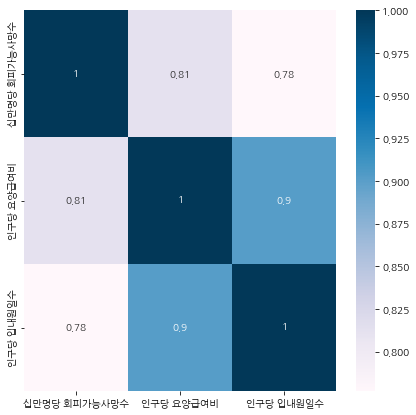

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(df1.corr(),
           annot = True, cmap = 'PuBu', )

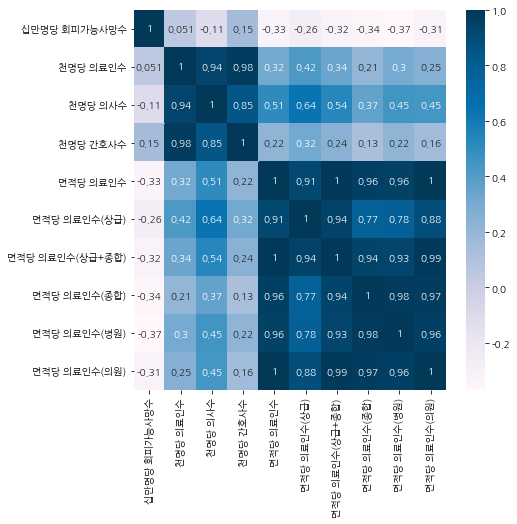

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(df2.corr(),
           annot = True, cmap = 'PuBu', )

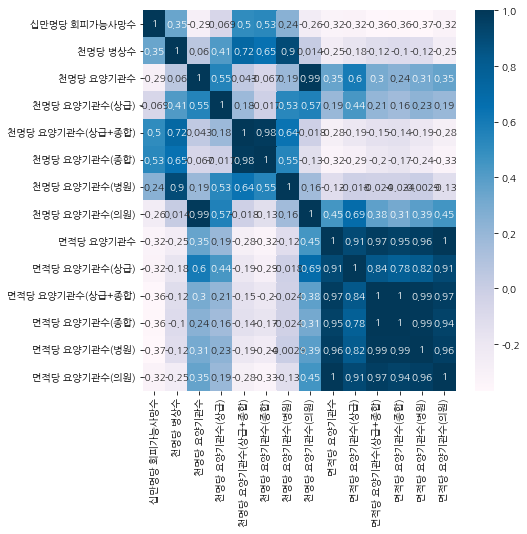

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(df3.corr(),
           annot = True, cmap = 'PuBu', )